<a href="https://colab.research.google.com/github/IvanFP26/MachineLearning/blob/main/Week5/EDA_SalesData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
#Nama : Ivan Fernanda Prayoga
#NIM : 1103204035
#Exploratory Data Analysis Sales Data

In [80]:
# Import library yang dibutuhkan
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer

In [81]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
# Menggunakan path ke file di Google Drive
file_path = '/content/drive/MyDrive/Machine Learning/Sales_Data.csv'

# Membaca file CSV dan menyimpannya dalam variabel store
store = pd.read_csv(file_path)

In [83]:
# Isi dalam dataset
store

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12
...,...,...,...,...,...,...,...,...,...,...,...
185945,13617,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19
185946,13618,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City,19
185947,13619,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18
185948,13620,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18


In [84]:
# Mencetak jumlah nilai unik dalam setiap kolom dari DataFrame store
print(store.nunique(axis=0))

Unnamed: 0           25093
Order ID            178437
Product                 19
Quantity Ordered         9
Price Each              17
Order Date          142395
Purchase Address    140787
Month                   12
Sales                   53
City                     9
Hour                    24
dtype: int64


In [85]:
# Mengecek Informasi pada Dataset
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB


In [86]:
# Mengubah Atribut 'Quantity Ordered' Menjadi 'Quantity'
store['Quantity'] = store['Quantity Ordered']
# Mengubah Atribut 'Order Date' Menjadi 'Date'
store['Date'] = store['Order Date']
# Menhilangkan kolom Purchase Address
store.drop(columns=['Purchase Address'], inplace=True)

In [87]:
# Melihat Keberadaan Data 'null' (missing value) pada Dataset
store.isnull().sum()

Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Month               0
Sales               0
City                0
Hour                0
Quantity            0
Date                0
dtype: int64

In [88]:
# Melihat Deskripsi Statistika Dataset
store.describe()

,Unnamed: 0,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour,Quantity
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,8340.388475,230417.569379,1.124383,184.399735,7.059140,185.490917,14.413305,1.124383
std,5450.554093,51512.737110,0.442793,332.731330,3.502996,332.919771,5.423416,0.442793
min,0.000000,141234.000000,1.000000,2.990000,1.000000,2.990000,0.000000,1.000000
25%,3894.000000,185831.250000,1.000000,11.950000,4.000000,11.950000,11.000000,1.000000
50%,7786.000000,230367.500000,1.000000,14.950000,7.000000,14.950000,15.000000,1.000000
75%,11872.000000,275035.750000,1.000000,150.000000,10.000000,150.000000,19.000000,1.000000
max,25116.000000,319670.000000,9.000000,1700.000000,12.000000,3400.000000,23.000000,9.000000


In [89]:
# Cek Nilai 0 pada Atribut 'Sales' dan 'Hour'
Sales = (store.Sales == 0).sum()
Hour = (store.Hour == 0).sum()

print("Nilai 0 di kolom Sales ada: ", Sales)
print("Nilai 0 di kolom y Hour: ", Hour)

Nilai 0 di kolom Sales ada:  0
Nilai 0 di kolom y Hour:  3910


In [90]:
# Mengecekkan menggunakan atribut Hour dengan nilai 0 lebih banyak dari nilai Sales
store.loc[(store['Hour']==0)]

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Month,Sales,City,Hour,Quantity,Date
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,12,1700.00,New York City,0,1,2019-12-30 00:01:00
25,25,295687,Apple Airpods Headphones,1,150.00,2019-12-10 00:38:00,12,150.00,Boston,0,1,2019-12-10 00:38:00
28,28,295690,Apple Airpods Headphones,1,150.00,2019-12-04 00:44:00,12,150.00,Seattle,0,1,2019-12-04 00:44:00
44,44,295704,Wired Headphones,1,11.99,2019-12-12 00:20:00,12,11.99,New York City,0,1,2019-12-12 00:20:00
126,126,295780,USB-C Charging Cable,1,11.95,2019-12-26 00:08:00,12,11.95,Boston,0,1,2019-12-26 00:08:00
...,...,...,...,...,...,...,...,...,...,...,...,...
185732,13404,222703,Flatscreen TV,1,300.00,2019-06-05 00:26:00,6,300.00,New York City,0,1,2019-06-05 00:26:00
185789,13461,222758,Lightning Charging Cable,2,14.95,2019-06-25 00:02:00,6,29.90,Dallas,0,2,2019-06-25 00:02:00
185857,13529,222822,Macbook Pro Laptop,1,1700.00,2019-06-17 00:18:00,6,1700.00,San Francisco,0,1,2019-06-17 00:18:00
185875,13547,222840,AA Batteries (4-pack),2,3.84,2019-06-22 00:34:00,6,7.68,Austin,0,2,2019-06-22 00:34:00


In [91]:
# Menghapus Nilai 0 pada Variabel 'Sales' dan 'Hour'
store = store.loc[(store[['Sales','Hour']]!=0).all(axis=1)]

In [92]:
# Cek Ukuran Data Saat Ini
store.shape

(182040, 12)

**Univariate EDA**

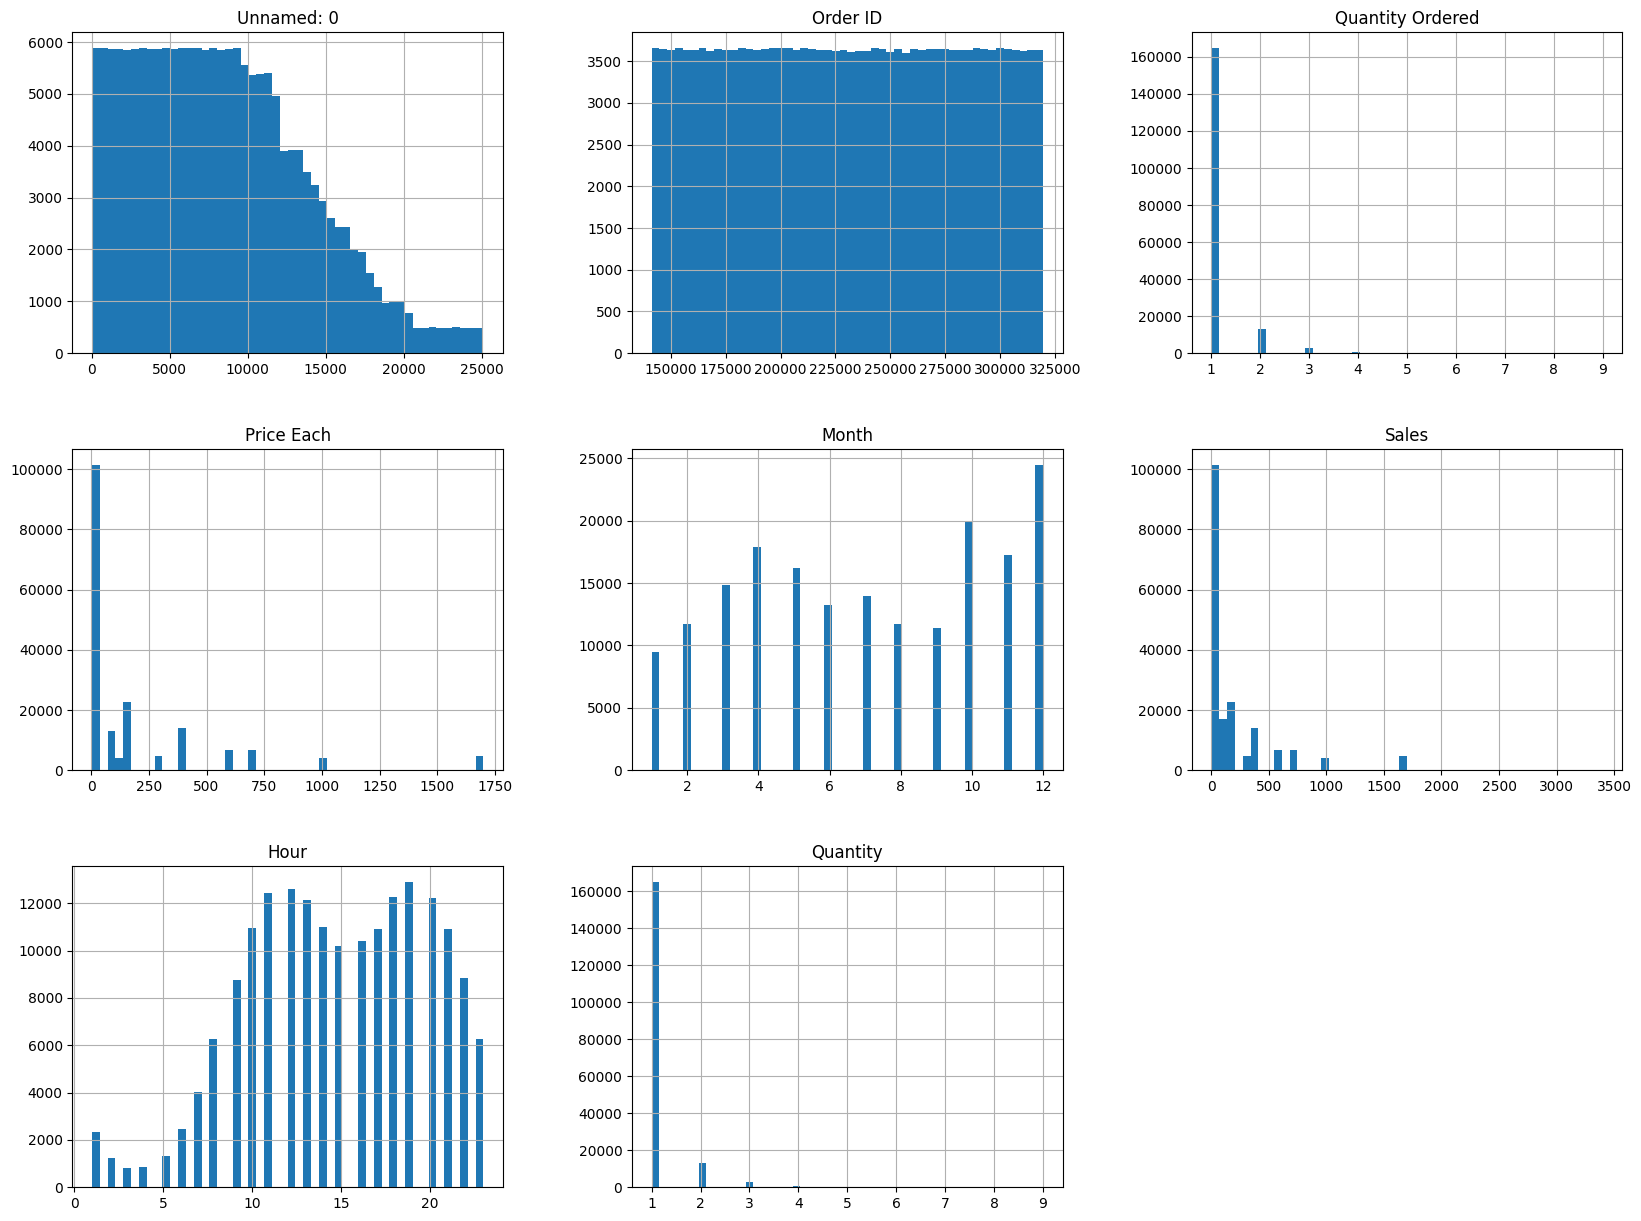

In [93]:
# Analisis Fitur Numerik dengan data fitur tunggal
store.hist(bins=50, figsize=(20,15))
plt.show()

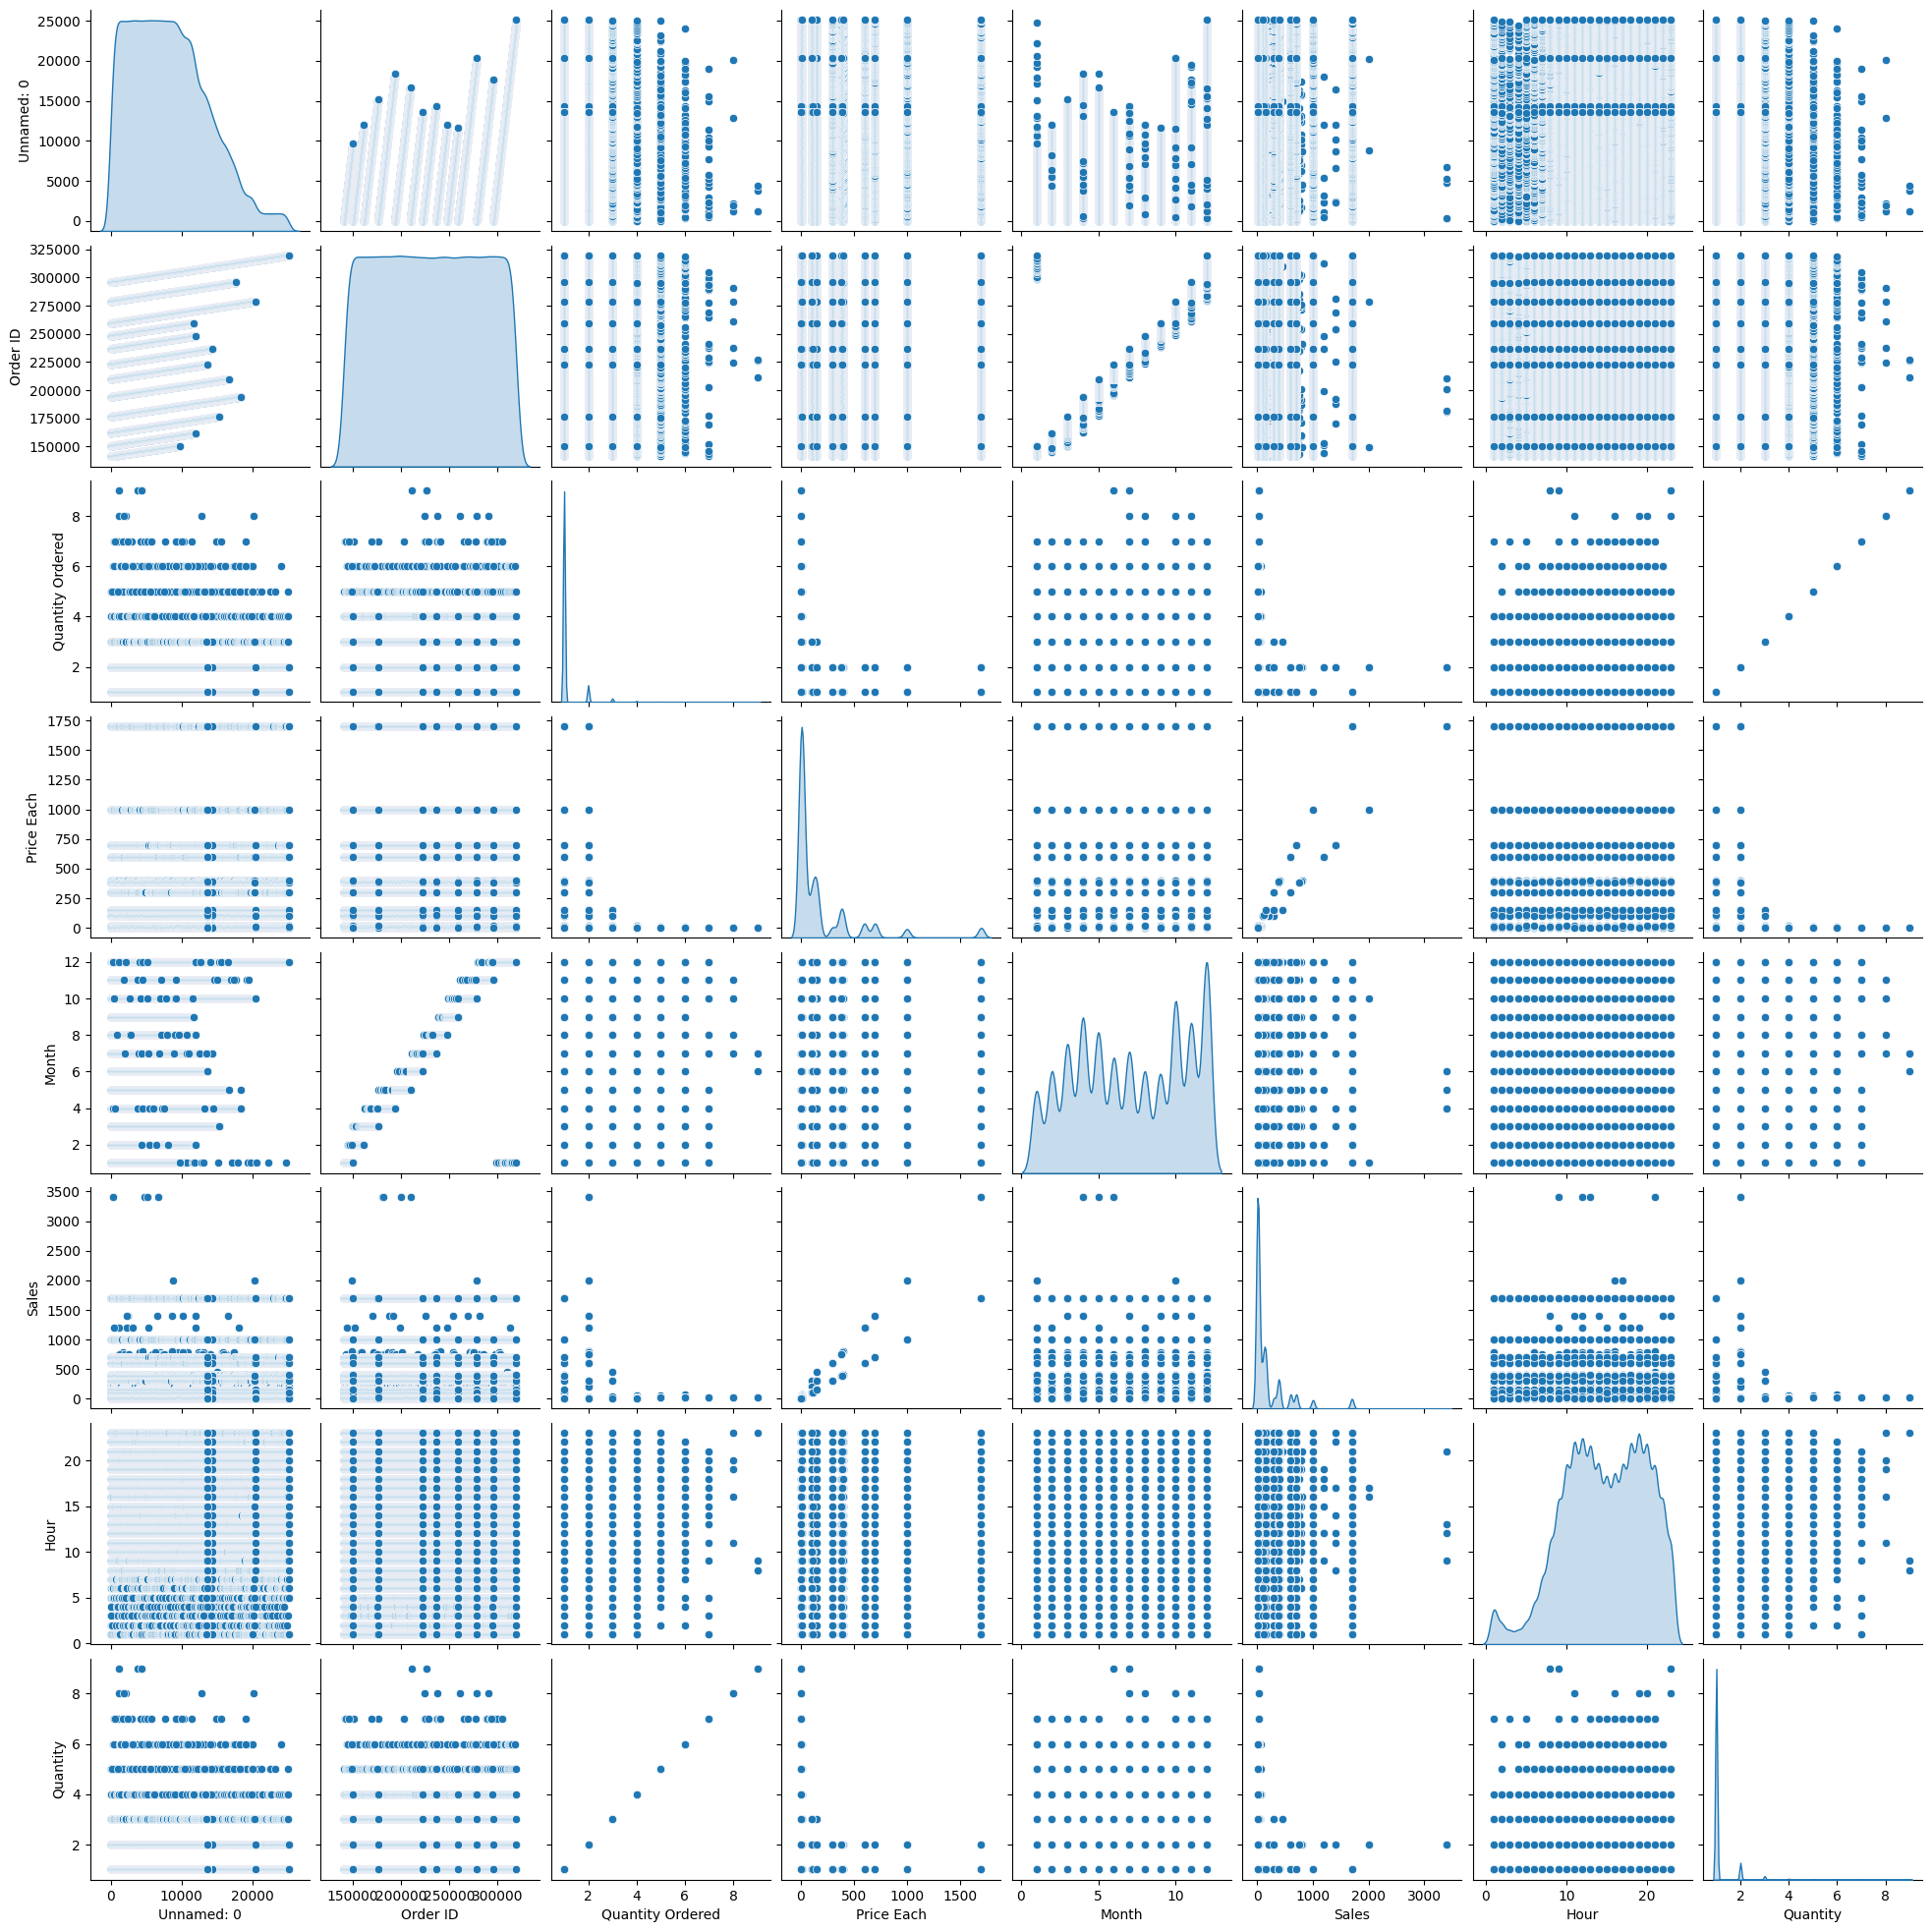

In [94]:
# Mengamati Hubungan Antar Fitur Numerik dengan Fungsi 'pairplot()'
sns.pairplot(store, diag_kind = 'kde')

<ipython-input-95-844a49df66ca>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = store.corr().round(2)


Text(0.5, 1.0, 'Correlation Matrix untuk tiap fitur ')

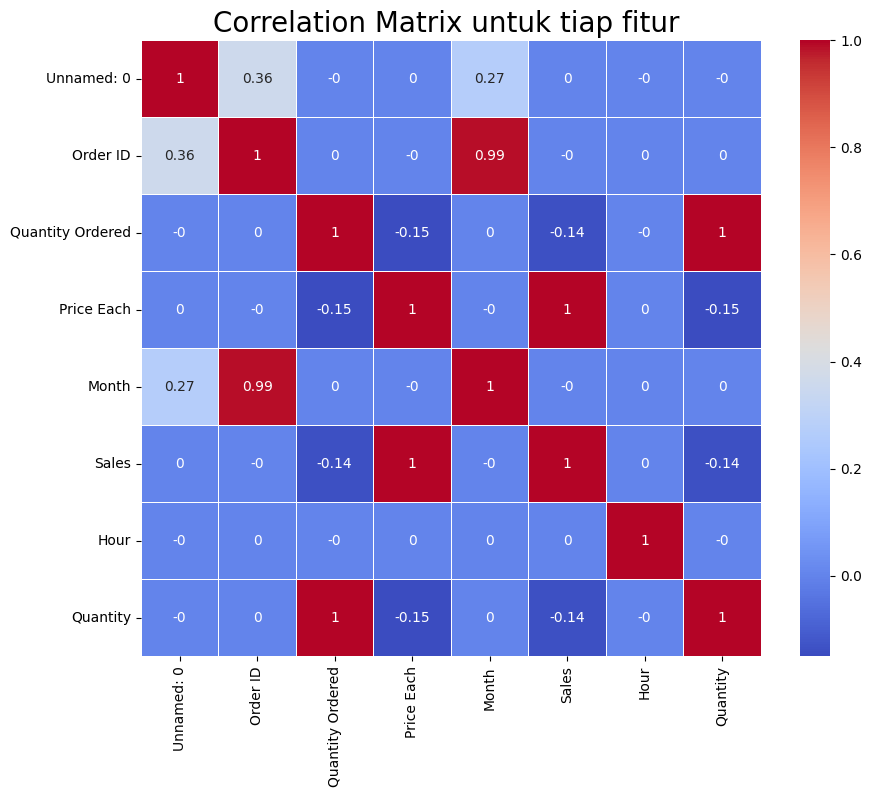

In [95]:
# Evaluasai Skor Korelasi dengan Fungsi 'corr()'
plt.figure(figsize=(10, 8))
correlation_matrix = store.corr().round(2)

# Parameter 'annot = True', untuk menampilkan nilai dalam persegi
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk tiap fitur ", size=20)

In [96]:
# Inisialisasi atribut dan target
X = store[['Quantity', 'Sales', 'Hour']]
y = store['Price Each']

In [97]:
# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=123)

In [98]:
# Menampilkan total dataset secara keseluruhan, total dataset latih, total dataset uji
print(f'Total # sampel di seluruh dataset: {len(X)}')
print(f'Total # sampel di seluruh dataset: {len(X_train)}')
print(f'Total # sampel di seluruh datasett: {len(X_test)}')

Total # sampel di seluruh dataset: 182040
Total # sampel di seluruh dataset: 163836
Total # sampel di seluruh datasett: 18204


**Normalisasi Data dengan StandardScaler**

In [99]:
# Standarisasi Data Latih
numerical_features = ['Quantity', 'Sales', 'Hour']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,Quantity,Sales,Hour
48832,-0.281026,-0.520679,-0.737237
50694,1.976829,0.043732,1.045213
166407,-0.281026,-0.511674,-0.143087
138365,-0.281026,-0.520679,0.451063
118165,-0.281026,1.244474,-0.143087


In [100]:
#cek nilai rata-rata (mean) dan standar deviasi (std) setelah di standarisasi
X_train[numerical_features].describe().round(4)

,Quantity,Sales,Hour
count,163836.0000,163836.0000,163836.0000
mean,0.0000,-0.0000,0.0000
std,1.0000,1.0000,1.0000
min,-0.2810,-0.5476,-2.7177
25%,-0.2810,-0.5207,-0.7372
50%,-0.2810,-0.5117,0.0550
75%,-0.2810,-0.1063,0.8472
max,17.7818,9.6493,1.6394


In [101]:
#Scaling data uji
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [102]:
# Menggunakan SimpleImputer untuk mengisi nilai yang hilang dalam X_train dengan menggunakan mean (rata-rata).
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

**Pengembangan Model**

**Decision Tree**

In [103]:
# Melakukan pendekatan pohon keputusan untuk mempelajari hubungan antara fitur dan target dalam data.
dtr = DecisionTreeRegressor(random_state=42)

In [104]:
# Mengisi nilai yang hilang dalam X_train dengan menggunakan strategi mean (rata-rata)
dtr.fit(X_train_imputed, y_train)
score_dtr = dtr.score(X_train_imputed, y_train)
print(score_dtr)

1.0


**Random Forest Regressor**

In [105]:
# Membuat objek RandomForestRegressor dengan menggunakan n_estimators=500
rfr = RandomForestRegressor(n_estimators=500)

In [106]:
# Menghitung skor kesesuaian model pada data pelatihan, dan mencetak skor tersebut ke output
rfr.fit(X_train_imputed, y_train)
score_rfr = rfr.score(X_train_imputed, y_train)
print(score_rfr)

0.9999972512512554


**KNN**

In [107]:
# Membuat objek KNeighborsRegressor dengan menggunakan n_neighbors=2
knr = KNeighborsRegressor(n_neighbors = 2)

In [108]:
# Menghitung skor kesesuaian model pada data pelatihan, dan mencetak skor tersebut ke output
knr.fit(X_train_imputed, y_train)
score_knr = knr.score(X_train_imputed, y_train)
print(score_knr)

0.9999997849693836


**Evaluasi Model**

In [109]:
#Inisialisasi DataFrame RMSE
rmse = pd.DataFrame(columns=['train', 'test'], index=['DTR', 'RFR', 'KNR'])
model_dict = {'DTR': dtr, 'RFR': rfr, 'KNR': knr}

for name, model in model_dict.items():
    #Lakukan imputasi untuk data latih dan data uji
    X_train_imputed = imputer.transform(X_train)
    X_test_imputed = imputer.transform(X_test)

    #Hitung RMSE untuk data latih dan data uji
    rmse.loc[name, 'train'] = np.sqrt(mean_squared_error(y_true=y_train, y_pred=model.predict(X_train_imputed))/1e3)
    rmse.loc[name, 'test'] = np.sqrt(mean_squared_error(y_true=y_test, y_pred=model.predict(X_test_imputed))/1e3)

rmse

,train,test
DTR,0.0,0.0
RFR,0.017454,0.000281
KNR,0.004882,0.008697


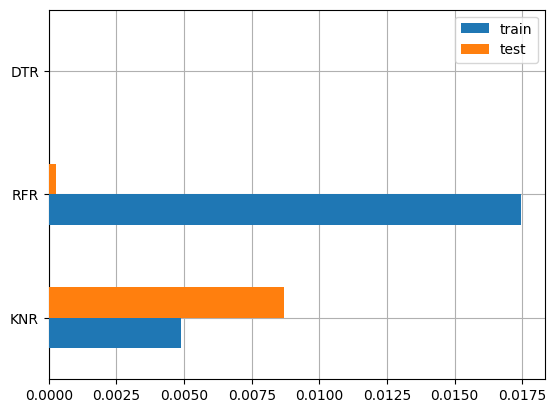

In [110]:
#Memvisualisasikan Nilai RMSE untuk Masing-masing Model Pada Proses Latihan Maupun Pengujian
fig, ax = plt.subplots()
rmse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [111]:
# Uji model dengan data test
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


,y_true,prediksi_DTR,prediksi_RFR,prediksi_KNR
153139,14.95,15.0,15.0,15.0
